In [10]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [59]:
# Parameters
N = 16                  # one flux quanta through the sites size 
B = 2 * 3.14159/N       # Magnetic field
t = 1                   # Hopping parameter         
D = 50                  # No of such cells in a unitcell of nanoribbon

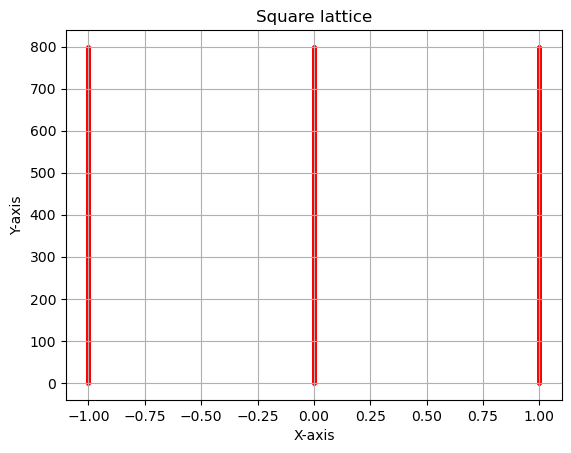

In [60]:
# Defining the Base lattice  - (SQUARE LATICE)
# lattice translation vectors
A1 = [1, 0]
A2 = [0, 1]


# Lattice generation and visualization
sqX_x = []
sqX_y = []
for col in range(0, D*N):
    for row in range(-1, 2):
        sqX_x.append((A1[0] * row) + (A2[0] * col))
        sqX_y.append((A1[1] * row) + (A2[1] * col))

# Plot the points
g = plt.figure();
plt.scatter(sqX_x, sqX_y, color='red', s=5)
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Square lattice')
plt.grid(True)
plt.show()

800


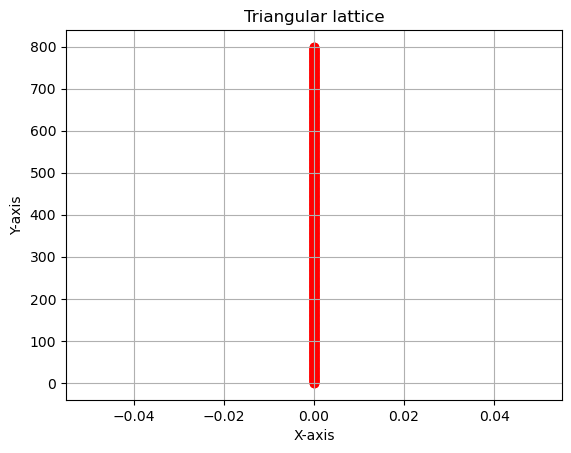

In [61]:
# unit cell of the nano-ribbon
unitcell_x = []
unitcell_y = []
# Bounds of unit cell
Xlow =  - 0.5
Xhigh = 0.5
Ylow =  - 0.5
Yhigh = (D*N) + 0.5
for i in range(len(sqX_x)):
    [x, y] = [sqX_x[i], sqX_y[i]]
    if x >= Xlow and x < Xhigh and y >= Ylow and y < Yhigh:
        unitcell_x.append(x)  
        unitcell_y.append(y)

#print(unitcell_x)
print(len(unitcell_y))

g = plt.figure();
plt.scatter(unitcell_x, unitcell_y, color='red')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Triangular lattice')
plt.grid(True)
plt.show()

In [62]:
# neighbour table formation
# translation vector
Tx = [1, 0]
D1 = [1, 0]
D2 = [-1, 0]
D3 = [0, 1]
D4 = [0, -1]

NN3 = []
NN4 = []

def neig_3(i, j):
    [x, y] = [unitcell_x[i], unitcell_y[i]]
    [x1, y1] = [unitcell_x[j], unitcell_y[j]]
    # NN1 
    if np.allclose([x1, y1],[x + D3[0] , y + D3[1]]):
        NN3.append(j)
    elif np.allclose([x1, y1],[x + D3[0] , y + D3[1] - (N*D) ]):
        NN3.append(None)
    return 

def neig_4(i, j):
    [x, y] = [unitcell_x[i], unitcell_y[i]]
    [x1, y1] = [unitcell_x[j], unitcell_y[j]]
    # NN1 
    if np.allclose([x1, y1],[x + D4[0] , y + D4[1]]):
        NN4.append(j)
    elif np.allclose([x1, y1],[x + D4[0] , y + D4[1] + (N*D) ]):
        NN4.append(None)
    return 

for i in tqdm(range(len(unitcell_x))):
    for j in range(len(unitcell_x)):
        neig_3(i, j)
        neig_4(i, j)

#print(NN1)
#print(NN2)
#print(NN3)
#print(NN4)

100%|██████████| 800/800 [00:59<00:00, 13.50it/s]


In [63]:
# index for implementing periodicity in applied field
ind = [i for i in range(N)]
xdir_ind = [ind[i % N] for i in range(D*N)]
#print(ydir_ind)

In [64]:
" Defining the Hamiltonian Matrix "
def H(kx):
    k = [kx, 0]
    Hij = np.zeros((len(unitcell_x), len(unitcell_x)), dtype=np.complex128)
    for i in range(0,len(unitcell_x)):
        Hij[i][i] = 2 * t * np.cos(kx + (-B*(xdir_ind[i]))) 
    for i in range(len(unitcell_x)): 
        n3, n4 = NN3[i], NN4[i] 
        if n3 is not None : 
            n3 = int(n3)
            Hij[n3][i] = t 
        if n4 is not None :
            n4 = int(n4)
            Hij[n4][i] = t 
    return Hij  

In [25]:
BZ = np.linspace(0, (2*np.pi), 100)

band = np.zeros((len(unitcell_x), len(BZ)))
for i in tqdm(range(0, len(BZ))):
    eigen = np.linalg.eigvalsh(H(BZ[i]))
    for b_index in range(0, len(unitcell_x)):
        band[b_index][i] = eigen[b_index]
        

100%|██████████| 100/100 [00:02<00:00, 37.55it/s]


(0.0, 6.283185307179586)

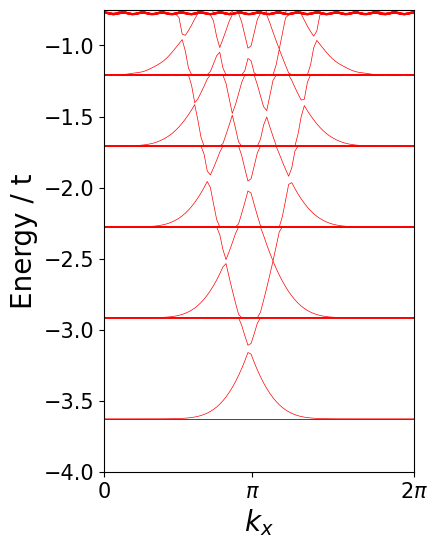

In [26]:
f = plt.figure(figsize=(4,6));   
for b_index in range(0, len(unitcell_x)):
    plt.plot( BZ, band[b_index], c = 'red', linestyle='-', linewidth = 0.5 )
plt.xlabel("$k_x$", fontsize=20);plt.axis('tight');
plt.ylabel("Energy / t", fontsize=20);
# Customize x-axis ticks with Greek symbols
plt.yticks(fontsize = 15)
plt.xticks( [0, int(BZ[-1]/2), BZ[-1]],[ 0, r'$\pi$', r'$2 \pi$'],fontsize=15)
plt.ylim(-4, -0.75)
plt.xlim(BZ[0], BZ[-1])

In [93]:
def sorted_kets(kx):
    eigenvalues, eigenvectors = np.linalg.eigh(H(kx))
    a = np.transpose(eigenvectors)
    return a

eigen_ket = np.zeros(len(unitcell_x), dtype=np.complex128)

band_index = 200

for i in tqdm(range(len(BZ))):
    ket = sorted_kets(BZ[i])[band_index]
    for j in range(len(eigen_ket)):
        value = abs(ket[j])**2
        eigen_ket[j] += value 
    
ele_prob = [eigen_ket[i]/len(BZ)  for i in range(len(unitcell_x))]
np.sum(ele_prob)

100%|██████████| 100/100 [00:25<00:00,  3.93it/s]


(1.0000000000000004+0j)

(array([-0.005,  0.   ,  0.005,  0.01 ,  0.015,  0.02 ,  0.025,  0.03 ,
         0.035,  0.04 ]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

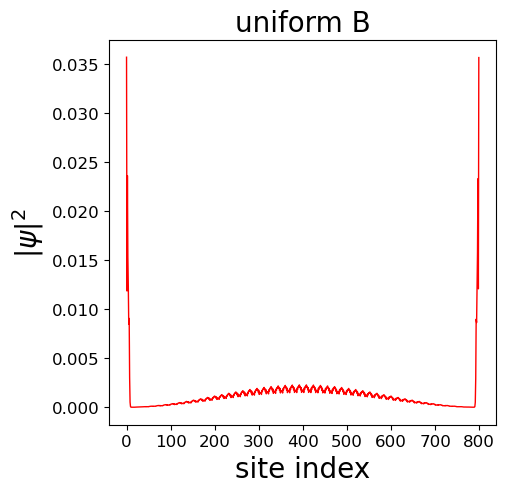

In [94]:
f = plt.figure(figsize=(5,5));   
plt.plot(unitcell_y,ele_prob, c = 'red', linestyle='-', linewidth = 1 )
#plt.scatter(unitcell_y,ele_prob, c = 'red', s=10)
plt.ylabel('$|\psi|^2$', fontsize = 20)
plt.xlabel('site index', fontsize = 20)
plt.title('uniform B', fontsize = 20)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
#plt.ylim(-3.6, -0.75)
#plt.xlim(BZ[0], BZ[-1])
#plt.xlim(750, 803)
#plt.xlim(-5, 50)

(-5.0, 50.0)

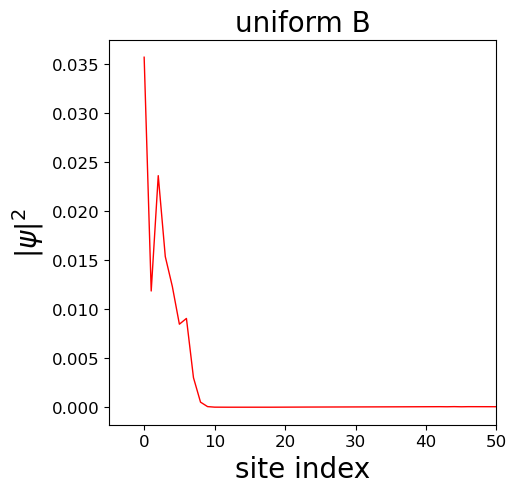

In [95]:
f = plt.figure(figsize=(5,5));   
plt.plot(unitcell_y,ele_prob, c = 'red', linestyle='-', linewidth = 1 )
#plt.scatter(unitcell_y,ele_prob, c = 'red', s=10)
plt.ylabel('$|\psi|^2$', fontsize = 20)
plt.xlabel('site index', fontsize = 20)
plt.title('uniform B', fontsize = 20)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
#plt.ylim(-3.6, -0.75)
#plt.xlim(BZ[0], BZ[-1])
#plt.xlim(750, 803)
plt.xlim(-5, 50)

(750.0, 803.0)

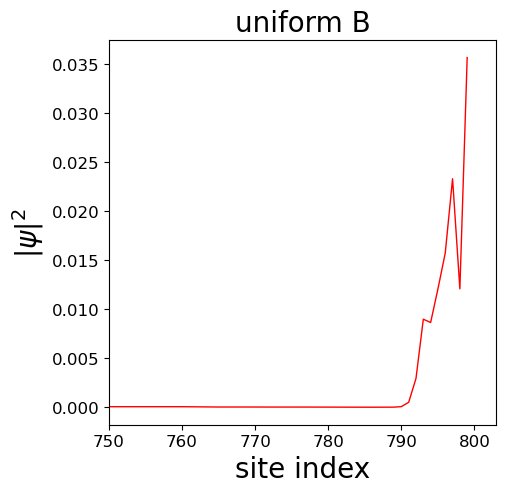

In [96]:
f = plt.figure(figsize=(5,5));   
plt.plot(unitcell_y,ele_prob, c = 'red', linestyle='-', linewidth = 1 )
#plt.scatter(unitcell_y,ele_prob, c = 'red', s=10)
plt.ylabel('$|\psi|^2$', fontsize = 20)
plt.xlabel('site index', fontsize = 20)
plt.title('uniform B', fontsize = 20)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
#plt.ylim(-3.6, -0.75)
#plt.xlim(BZ[0], BZ[-1])
plt.xlim(750, 803)
#plt.xlim(-5, 50)